In [1]:
import os, sys, math
sys.path.insert(0, '../../../FISH-annotation/Annotation')
from SpotAnnotationAnalysis import SpotAnnotationAnalysis
from QuantiusAnnotation import QuantiusAnnotation
import util
import pandas as pd

In [2]:
json_name = 'quadrants.json'
img_names = ['rca-lna_cy3_q' + str(i) for i in range(1,5)]
cwd = os.getcwd()
new_dir = cwd + '/naive_anno/'
if not os.path.exists(new_dir):
    os.makedirs(new_dir)

------------------------ rca-lna_cy3_q1 ------------------------


<Figure size 864x504 with 0 Axes>

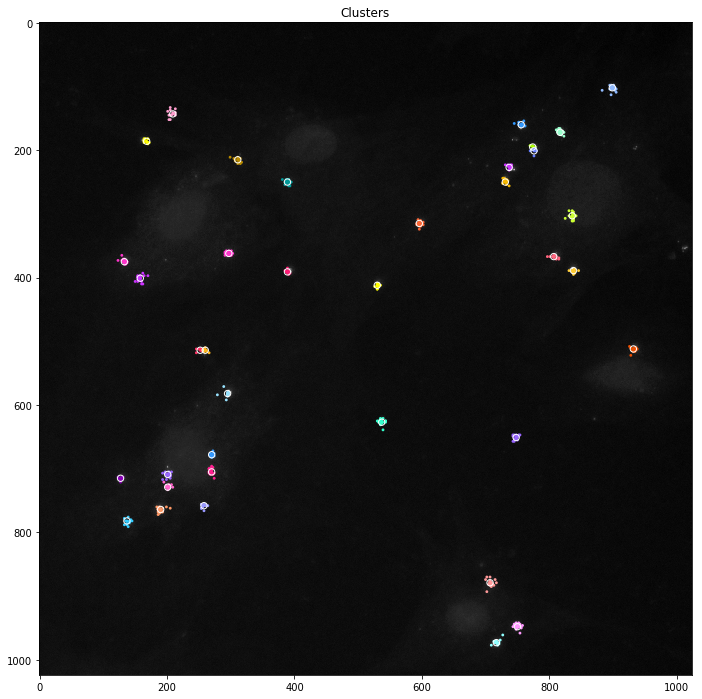

------------------------ rca-lna_cy3_q2 ------------------------


<Figure size 864x504 with 0 Axes>

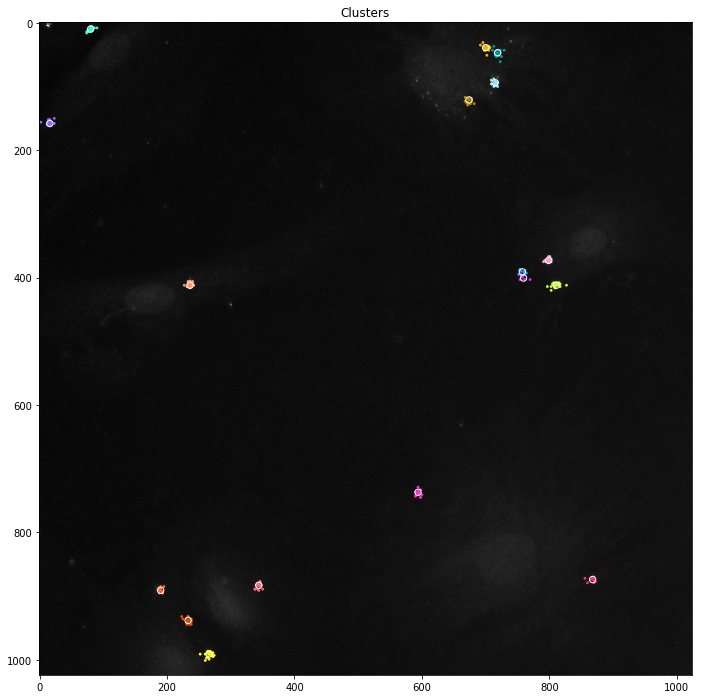

------------------------ rca-lna_cy3_q3 ------------------------


<Figure size 864x504 with 0 Axes>

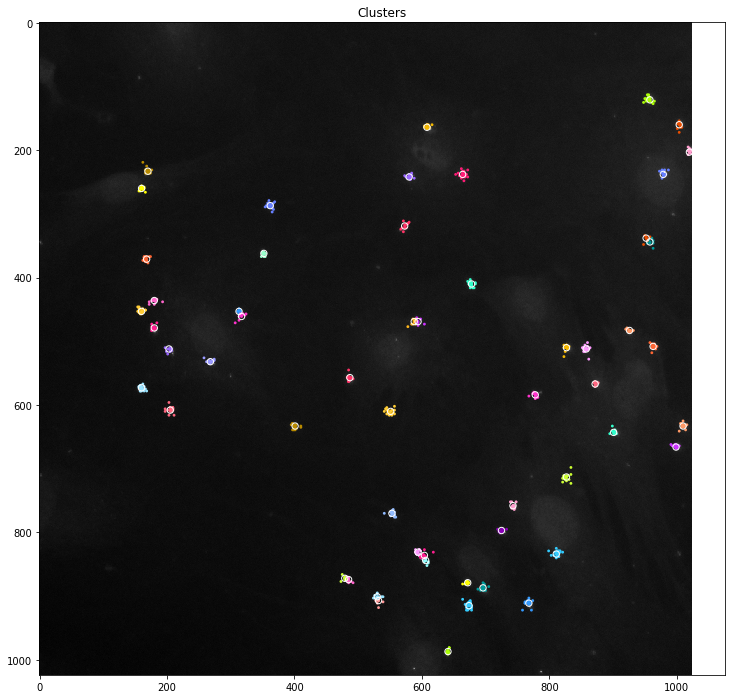

------------------------ rca-lna_cy3_q4 ------------------------


<Figure size 864x504 with 0 Axes>

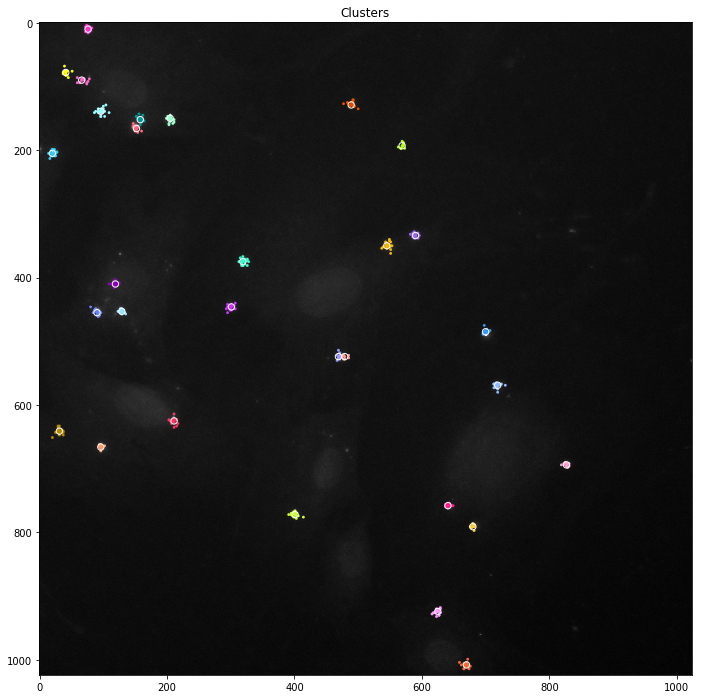

In [4]:
for img_name in img_names:

    print('------------------------ ' + img_name + ' ------------------------')
    img_filepath = cwd + '/images/' + img_name + '.png'
    csv_filepath = cwd + '/naive_anno/' + img_name + '.csv'
    qa = QuantiusAnnotation(json_name, img_name + '.png')
    sa = SpotAnnotationAnalysis(qa)
    anno_all = qa.df()

    clustering_params = ['AffinityPropagation', -350]
    clusters = sa.get_clusters(anno_all, clustering_params)

    img_height = anno_all['height'].values[0]

    cluster_size_threshold = util.get_cluster_size_threshold(clusters)
    small_clusters, large_clusters = util.sort_clusters_by_size(clusters, cluster_size_threshold)
    clumpiness_threshold = util.get_clumpiness_threshold(large_clusters)
    clumpy_clusters, nonclumpy_clusters = util.sort_clusters_by_clumpiness(large_clusters, clumpiness_threshold)
    declumping_params = ['KMeans', 2]
    result_clusters = nonclumpy_clusters
    for i in range(len(clumpy_clusters.index)):
        subclusters = util.declump(clumpy_clusters, i, declumping_params)
        result_clusters = pd.concat([subclusters, result_clusters], ignore_index=True)
    plot_title = 'All large clusters. Clumpy clusters have been declumped.'
    show_workers = True
    show_centroids = True
    util.visualize_clusters(clusters=result_clusters, img_filepath=img_filepath, img_height=img_height, plot_title='Clusters', show_workers=True, show_centroids=True, bigger_window_size=True)
    result_clusters.to_csv(path_or_buf=csv_filepath)